# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response=requests.get(btc_url).json()
btc_price= btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_response=requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
 
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc * btc_price
my_eth_value=my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75042.46
The current value of your 5.3 ETH is $27291.46


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [45]:
# Set current amount of shares
my_agg = 200
my_spy = 50


In [39]:
# Set Alpaca API key and secret
# Create the Alpaca API object
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [55]:
# Format current date as ISO format

#today = pd.Timestamp("2021-12-11", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2017-12-11", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df





# Preview DataFrame
df_portfolio.dropna(inplace=True)
df_portfolio.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189.0   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954.0  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044.0  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478.0  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906.0  
2017-12-28 00:00:00-05:00  267.85  267.920  267.450  267.86  23583584.0

In [56]:
# Pick AGG and SPY close prices
agg_close_price=(df_portfolio["AGG"]["close"][0])
spy_close_price=(df_portfolio["SPY"]["close"][0])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.83
Current SPY closing price: $267.57


In [57]:
# Compute the current value of shares
my_agg_value=agg_close_price* my_agg
my_spy_value=spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $13378.50
The current value of your 200 AGG shares is $21766.00


### Savings Health Analysis

In [58]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]
# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])
# Display savings DataFrame
display(df_savings)

,amount
crypto,102333.921447
shares,35144.500000


<AxesSubplot:title={'center':'personal saving composition'}, ylabel='amount'>

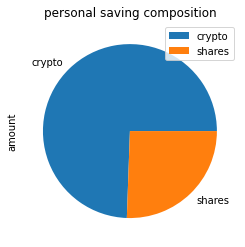

In [60]:
# Plot savings pie chart
df_savings.plot.pie(y="amount",title= "personal saving composition" )

In [72]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
differnce= total_savings-emergency_fund

In [81]:
# Validate saving health
if total_savings > emergency_fund:
    print ("Congratulations! You have enough money in your emergency fund.")  
elif total_savings == emergency_fund:
    print ("Congratulations!You have  reached your financial goal")
else:
    print(f"Based on your data , you are ${differnce:0.2f} away from reaching your goal")
print()

Congratulations! You have enough money in your emergency fund.



## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")